In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from crk87 import rk_error_control

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res
    
def plot_shapes_of_error(continous_sol, solution, name):
    minimum_step_size = 1e-5
    errors_small_steps = []
    plt.figure()
    for interp in continous_sol.interps:
        num_points = 100
        pts_to_sample = create_t_eval(interp.x_i, interp.x_i_plus_1, num_points)
        errors = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            interp_eval = interp.eval(pt)
            errors.append( abs(interp_eval - y) )
        maximum_error = max(errors)
        plot_vals = [ error/ maximum_error for error in errors]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (interp.x_i_plus_1 - interp.x_i < minimum_step_size):
            errors_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(interp.x_i)}_{str(interp.x_i_plus_1)}")
    plt.title(f"{name}-plot of errors")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in errors_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of errors on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.show()

def plot_shapes_of_error_two_orders(continous_sol, lower_continous_sol):
    minimum_step_size = 1e-5
    errors_small_steps = []
    plt.figure()
    for interp in continous_sol.interps:
        num_points = 100
        pts_to_sample = create_t_eval(interp.x_i, interp.x_i_plus_1, num_points)
        errors = []
        for pt in pts_to_sample:
            lower_interp_eval = lower_continous_sol.eval(pt)
            interp_eval = interp.eval(pt)
            errors.append( abs(interp_eval - lower_interp_eval) )
        maximum_error = max(errors)
        plot_vals = [ error/ maximum_error for error in errors]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (interp.x_i_plus_1 - interp.x_i < minimum_step_size):
            errors_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(interp.x_i)}_{str(interp.x_i_plus_1)}")
    plt.title(f"plot of errors between two orders")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in errors_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of errors on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.show()

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol =1e-6
    (res, sol, lower_sol, error_samplings, lower_error_samplings) = rk_error_control(model, t_span, y0[0], tol)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    # for this_x in xs:
    #     plt.axvline(x=this_x) 

    computed_solutions = [sol.eval(x) for x in t_eval]
    lower_computed_solutions = [lower_sol.eval(x) for x in t_eval]
    # plt.plot(t_eval, computed_solutions, label="computed solution")

    actual_solutions = solution(t_eval)
    # plt.plot(t_eval, actual_solutions, label="actual solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    # plt.title(f"actual solution vs interpolated solution tol={tol}")
    # plt.xlabel("t")
    # plt.ylabel('y')
    # plt.legend(loc="upper right")
    # plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    lower_error = [abs(lower_computed_solution - actual_solution) for (lower_computed_solution, actual_solution) in zip(lower_computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="higher_order")
    plt.plot(t_eval, lower_error, label="lower_order")
    # plt.title(f"global error for tol={tol}")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # shape of errors - graphs
    plt.figure()
    for (x_i, x_i_plus_1, hb) in error_samplings:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            y = solution([pt])[0]
            hb_eval = hb.eval(pt)
            error = abs(hb_eval - y)
            errors.append( error )

        maximum_error = max(errors)
        if maximum_error < 1e-14: continue
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of exact errors of HIGHER ORDER")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled exact errors')
    # plt.legend()
    plt.show()

    plt.figure()
    for (x_i, x_i_plus_1, hb) in lower_error_samplings:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            y = solution([pt])[0]
            hb_eval = hb.eval(pt)
            error = abs(hb_eval - y)
            errors.append( error )

        maximum_error = max(errors)
        if maximum_error < 1e-14: continue
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of exact errors of LOWER ORDER")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled exact errors')
    # plt.legend()
    plt.show()

    plt.figure()
    for ((x_i, x_i_plus_1, lower_hb), (_, _, higher_hb)) in zip(lower_error_samplings, error_samplings):
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            lower_hb_eval  = lower_hb.eval(pt)
            higher_hb_eval = higher_hb.eval(pt)
            error = abs(lower_hb_eval - higher_hb_eval)
            errors.append( error )

        maximum_error = max(errors)
        if maximum_error < 1e-14: continue
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of ESTIMATED errors between interpolants")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled estimated errors')
    # plt.legend()
    plt.show()

    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

nsteps = 14
nsuccessful_steps = 14
integration complete


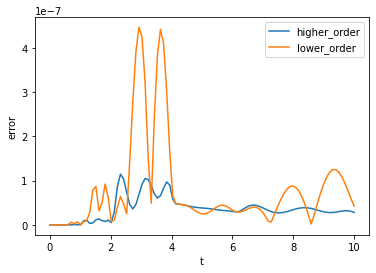

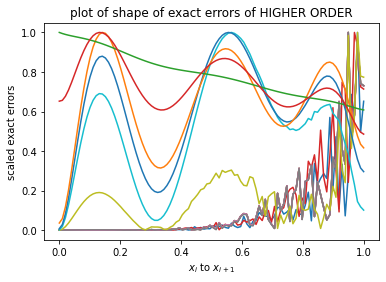

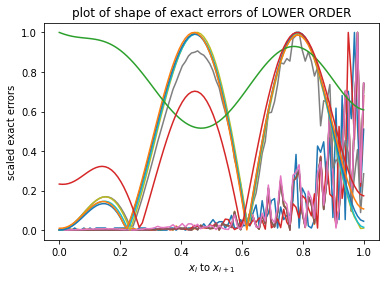

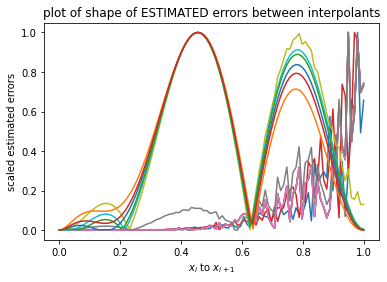

0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
6.661338147750939e-16
3.774758283725532e-15
7.631673071273326e-13
1.0214251666695873e-10
4.127976072076933e-09
4.795599745088808e-08
2.9176832005983755e-08
2.174028240764514e-08


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

nsteps = 20
nsuccessful_steps = 18
integration complete


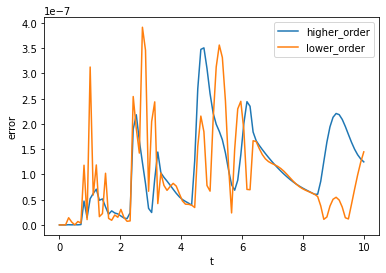

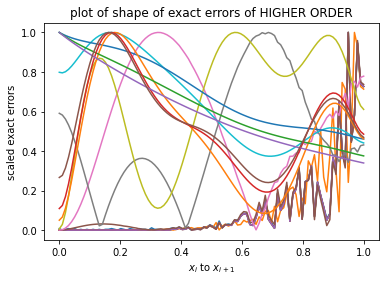

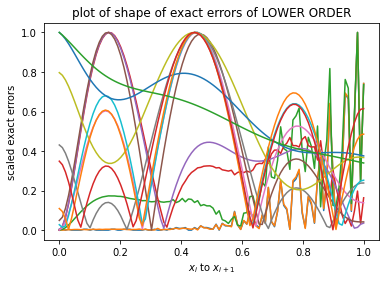

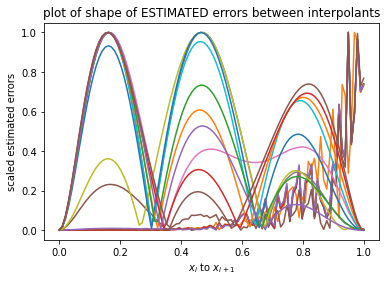

0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
2.220446049250313e-16
1.4876988529977098e-13
5.201292729850593e-10
4.409568266083852e-10
4.424955218906845e-08
2.4477740584449847e-08
1.1282936668299826e-08
1.038240538403512e-07
3.8993004172760415e-08
1.733056715497172e-07
5.8851248778760135e-08
1.0372225100509225e-07


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

nsteps = 15
nsuccessful_steps = 14
integration complete


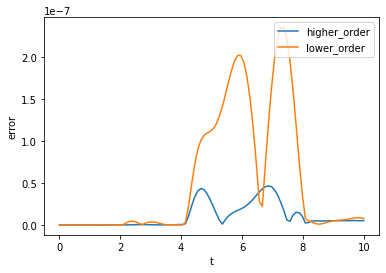

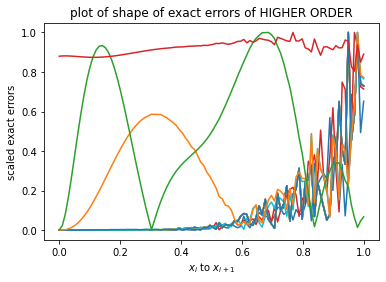

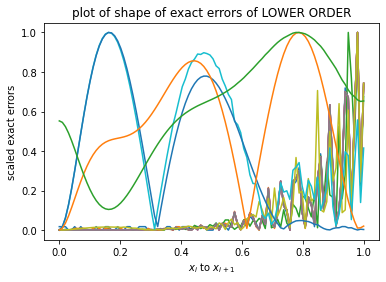

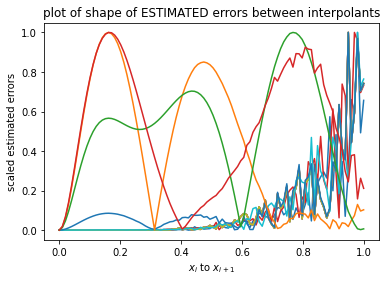

0.0
2.220446049250313e-16
0.0
0.0
2.220446049250313e-16
0.0
2.220446049250313e-16
0.0
2.220446049250313e-16
1.1102230246251565e-15
2.6645352591003757e-15
9.325873406851315e-15
8.076650459543089e-12
4.706611100857572e-09
5.494529276006688e-09


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

nsteps = 380
nsuccessful_steps = 318
integration complete


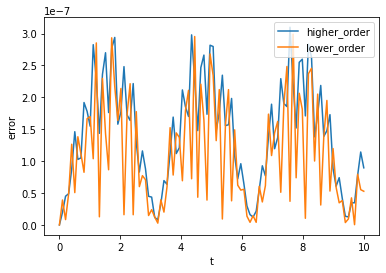

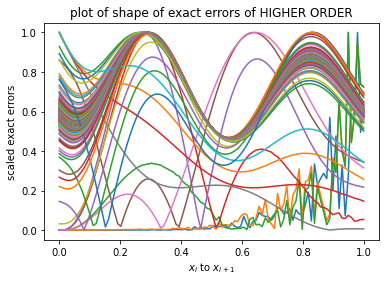

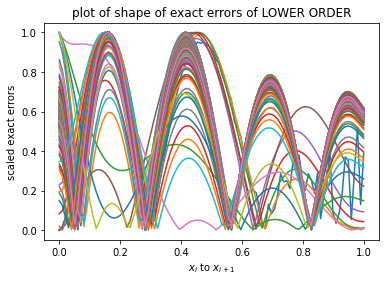

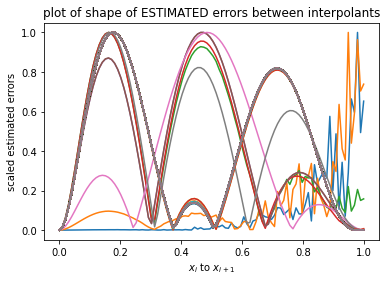

0.0
3.7947076036992655e-19
6.516055056637882e-17
1.7143404751340796e-14
7.3293229124749e-12
2.7502406046986394e-09
1.1086287582395826e-09
1.3841613796805596e-07
8.399501510991669e-10
1.788671361024896e-08
2.4705088724763513e-08
3.087714758875926e-08
3.6984248746874115e-08
4.305184614361579e-08
4.907526712782939e-08
5.5048490654741045e-08
6.096526122822965e-08
6.68196387665354e-08
7.26055634503453e-08
7.83172354745787e-08
8.394867662131489e-08
8.949412477754493e-08
9.494797892362072e-08
1.0030457842091778e-07
1.0555852092419826e-07
1.1070437766491636e-07
1.157368516579993e-07
1.2065082899415103e-07
1.254412799189808e-07
1.3010327271079092e-07
1.3463205839059356e-07
1.3902302054003002e-07
1.432715783789007e-07
1.4737350495508394e-07
1.5132449115995428e-07
1.5512052098376472e-07
1.5875774350693206e-07
1.6223242671475901e-07
1.655409915812811e-07
1.6868005614512072e-07
1.7164642818201514e-07
1.744370151657293e-07
1.7704899113457628e-07
1.7947970576415173e-07
1.8172660254389683e-07
1.837874

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

nsteps = 217
nsuccessful_steps = 145
integration complete


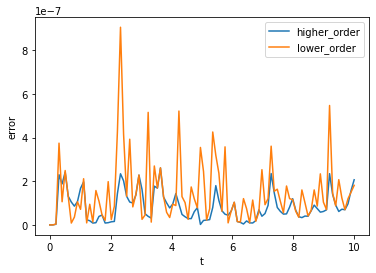

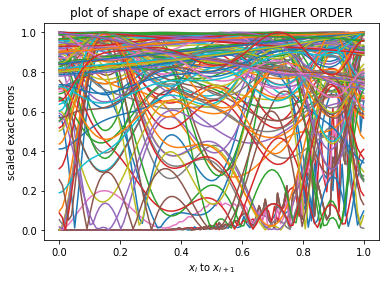

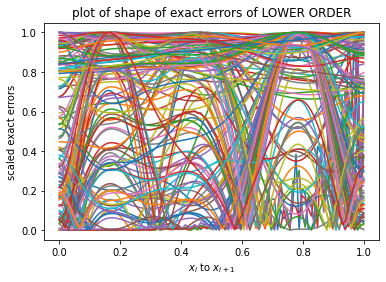

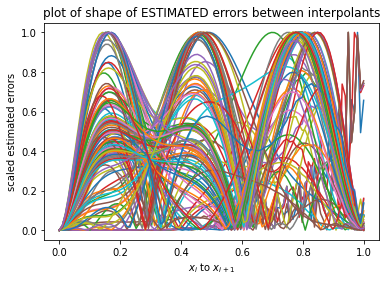

0.0
0.0
0.0
4.440892098500626e-16
0.0
4.440892098500626e-16
6.661338147750939e-15
1.7497114868092467e-13
3.2521985104949636e-10
1.8091364983874314e-07
2.5065198450135995e-07
2.602370532400755e-07
2.350913441695468e-07
1.5304139888705492e-07
1.154503599387624e-07
9.026599601114071e-08
1.0294149088707627e-07
1.2742255228737065e-07
1.7690042430906772e-07
2.1086873891462687e-07
2.3702281426452032e-07
3.9327517908915866e-08
2.6565379673826328e-08
2.031067269925302e-08
1.6636805710845692e-08
1.9755012736766275e-08
2.499329809779738e-08
3.627605504874509e-08
4.273386999820161e-08
4.604088577053744e-08
4.291840838277494e-08
1.5543521358907242e-08
1.2157834738957263e-08
1.1467386595853668e-08
1.2410974470355995e-08
2.0150145374486783e-07
2.775966281287623e-07
2.842877806497057e-07
2.541522752252945e-07
1.717078992324872e-07
1.3033562673570032e-07
1.0325483934536805e-07
1.1873125593808709e-07
1.4774991075050536e-07
2.0596388572435842e-07
2.449532490178541e-07
2.725788990076694e-07
2.645878576235

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

nsteps = 15
nsuccessful_steps = 15
integration complete


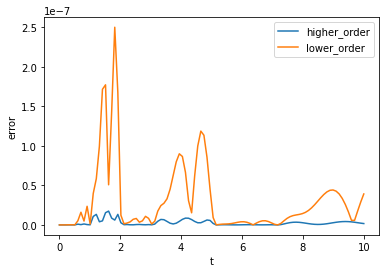

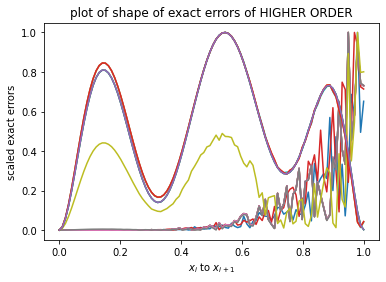

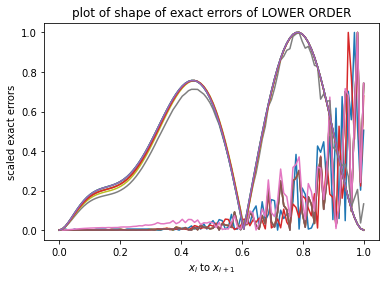

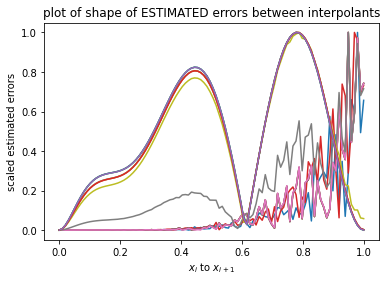

0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
2.220446049250313e-16
1.5543122344752192e-15
1.2212453270876722e-15
4.773959005888173e-15
4.052314039881821e-15
2.270406085358445e-14
1.9290125052862095e-14
3.444466933899548e-14
2.6076363290883364e-14
1.5112910922709943e-14


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

nsteps = 23
nsuccessful_steps = 18
integration complete


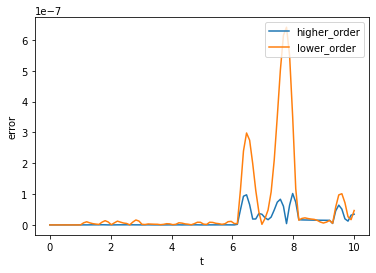

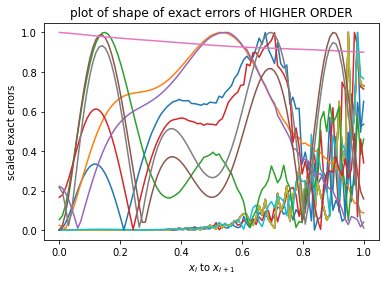

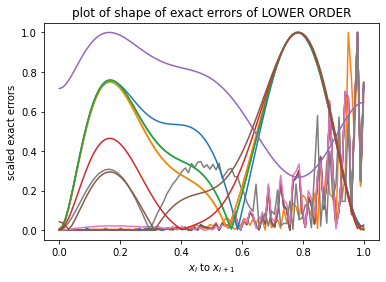

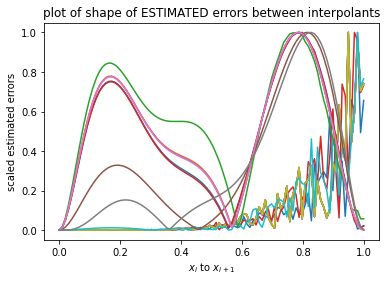

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.771561172376096e-16
1.3322676295501878e-15
4.4797499043625066e-14
1.0586143073254561e-11
2.0119905741466937e-11
5.4564408547008725e-11
5.927303092789771e-11
3.324640562851755e-11
1.6497129745607353e-08
1.4877710619032314e-08
9.495026292993813e-10


In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

nsteps = 22
nsuccessful_steps = 19
integration complete


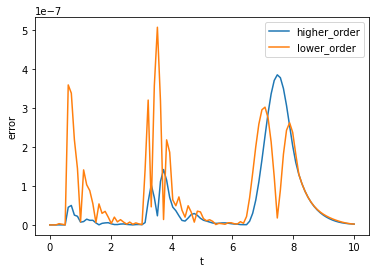

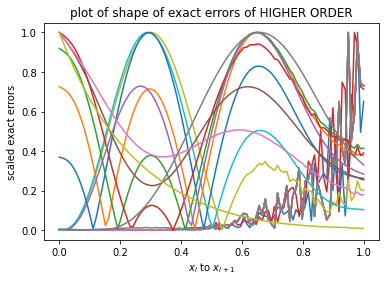

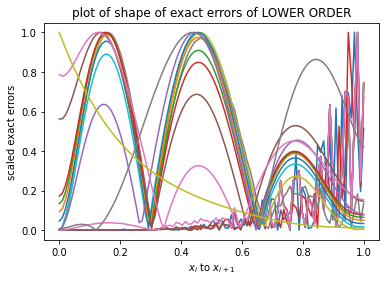

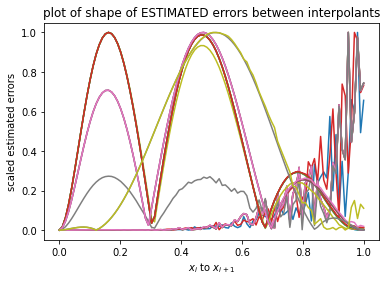

0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
3.3306690738754696e-16
5.10702591327572e-15
2.6423307986078726e-14
1.6973311645074318e-11
6.989622935993367e-09
5.018490512043172e-09
2.7032744931432262e-09
1.2944605387588126e-09
5.811031655866827e-10
4.043608625714512e-08
1.0421680407546319e-08
2.0159691693777404e-09
1.272995220347184e-07
1.427368445661159e-09


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)